<a href="https://colab.research.google.com/github/Subhrajyoti-Dutta/Stark-Foundation-Supervised-Learning/blob/main/Supervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

#Loading the Dataset

In [2]:
dataset_url = r'http://bit.ly/w-data'
data = pd.read_csv(dataset_url)
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [3]:
X = data[['Hours']]
Y = data[['Scores']]

print("Shape of X: ",X.shape)
print("Shape of Y: ",Y.shape)

Shape of X:  (25, 1)
Shape of Y:  (25, 1)


#Visualising the Data

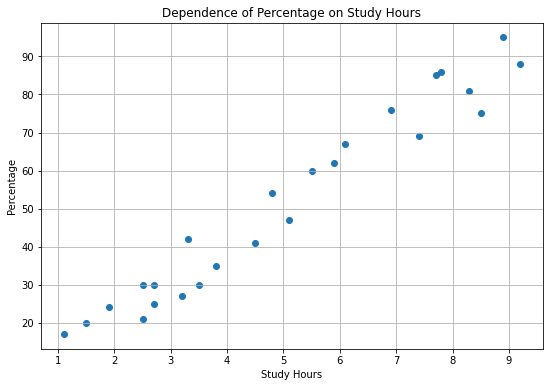

In [4]:
plt.figure(figsize=(9,6))
plt.scatter(X,Y)
plt.xlabel('Study Hours')
plt.ylabel('Percentage')
plt.title('Dependence of Percentage on Study Hours')
plt.grid()
plt.show()

#Spliting the dataset in to training and test set

Shuffle is a function to split the dataset into test and train set

In [5]:
def shuffle(X,Y, test_size, random_state = None):
    ds = pd.concat([X,Y],axis=1)
    ds_shuffle = ds.sample(frac = 1, random_state=random_state).reset_index(drop=True)
    n = int(ds_shuffle.shape[0]*(1-test_size))
    X_train = ds_shuffle.iloc[ :n, :X.shape[1]].values
    X_test  = ds_shuffle.iloc[n: , :X.shape[1]].values
    Y_train = ds_shuffle.iloc[ :n,X.shape[1]: ].values
    Y_test  = ds_shuffle.iloc[n: ,X.shape[1]: ].values
    return X_train, X_test, Y_train, Y_test

In [6]:
X_train, X_test, Y_train, Y_test = shuffle(X, Y, test_size = 0.2)

#Building and Training the model

In [7]:
model = tf.keras.Sequential()
model.add(
    tf.keras.layers.Dense(units=1, activation = None, input_shape=[1])
)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(optimizer='sgd', loss='mean_squared_error')

In [9]:
model.fit(X_train, Y_train, epochs = 100, verbose = 0)

#Visualising the Regression Line

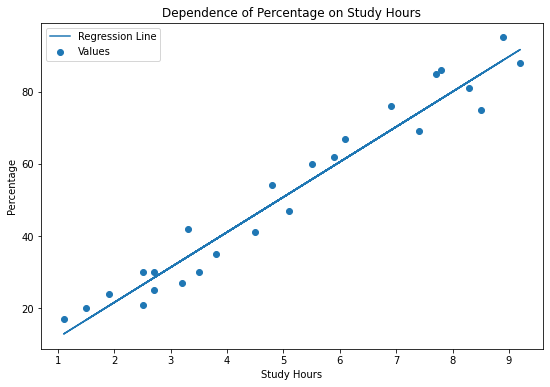

In [10]:
line = model.predict(X)

plt.figure(figsize=(9,6))
plt.scatter(X,Y)
plt.xlabel('Study Hours')
plt.ylabel('Percentage')
plt.title('Dependence of Percentage on Study Hours')
plt.plot(X,line)
plt.legend(['Regression Line','Values'])
plt.show()

#Predicting Output using the Model

In [11]:
Y_pred  = model.predict(X_test)
Y_pred

array([[45.94332 ],
       [69.28386 ],
       [59.558636],
       [88.7343  ],
       [82.89918 ]], dtype=float32)

#Comparing the predicted value with the actual value

In [12]:
pd.DataFrame({'Hours': X_test[:,0],
              'Actual Percentage': Y_test[:,0],
              'Predicted Percentage': Y_pred[:,0]})

,Hours,Actual Percentage,Predicted Percentage
0,4.5,41,45.943321
1,6.9,76,69.283859
2,5.9,62,59.558636
3,8.9,95,88.734299
4,8.3,81,82.899178


#Predicting the Percentage of the student who studies for 9.25 hours

In [14]:
model.predict([[9.25]])

array([[92.13813]], dtype=float32)

#Evaluating the Model

In [15]:
MAE = tf.keras.losses.MeanAbsoluteError()
print('Mean Absolute Error: ',MAE(Y_test, Y_pred).numpy())

Mean Absolute Error:  4.453141
